### Introduction

In the following notebook, I will be conducting a market analysis where I intend to look into the following:
- What was the loss in revenue due to COVID19? Where do you expect losses to be for the San Francisco are to be by the end of the year?
- How does the long term rental market compare to the of the tourist industry?
    - Which is more profitable? Is there evidence to suggest Airbnb should consider entering the rental housing market
    - Who are our most profitable hosts? Are people using Airbnb as a business or 

**Read in libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Set notebook preferences**

In [2]:
#Set pandas preferences
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:.2f}'.format

#Set visualization preferences
plt.style.use('Solarize_Light2')

#Set path to save visualizations
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Visualizations\Exploratory_Data_Analysis'

**Read in data**

In [8]:
#Set path to local machine
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Data\02_Cleaned'

#Read in file
df = pd.read_csv(path + '/2020_0715_Listings_Cleaned.csv', index_col=['last_review'],
                parse_dates=['last_review'])

#Sort data
df.sort_values('last_review', inplace = True)

### Data Overview

**Preview Data**

In [9]:
#Display data, print shape
print('Data shape:', df.shape)
display(df.head(3))

Data shape: (126258, 47)


,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cancellation_policy,city,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_name,host_response_rate,host_response_time,host_verifications,id,instant_bookable,is_location_exact,latitude,longitude,maximum_nights,minimum_nights,monthly_price,neighbourhood_cleansed,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_rating,reviews_per_month,room_type,security_deposit,weekly_price,zipcode
last_review,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-01,1,"Wifi,Kitchen, Free street parking , Hot tub ,...",21,335,30,60,1.00,Real Bed,1.00,1.00,4,nan,nan,moderate,San Francisco,30.00,0.00,1,1.00,73070632,0.00,0.00,Tina,87.00,within a few hours,"email , phone , reviews , jumio , offlin...",18546459,0,1,37.71,-122.45,1125,6,nan,Outer Mission,7,45.00,Condominium,0,0,1,97.00,0.57,Private room,100.00,nan,94112.00
2018-07-01,2,"TV, Cable TV ,Wifi,Kitchen, Free parking on p...",0,324,19,49,1.00,Real Bed,1.00,1.00,33,nan,nan,strict 14 with grace period,San Francisco,200.00,0.00,1,1.00,13832870,0.00,0.00,International,2.00,within an hour,"phone , reviews , jumio , offline governm...",18874655,0,1,37.80,-122.42,1125,30,nan,Russian Hill,2,148.00,Apartment,0,0,1,100.00,0.18,Entire home/apt,1500.00,nan,94133.00
2018-07-01,2,"TV, Cable TV ,Wifi,Kitchen, Free parking on p...",29,364,59,89,1.00,Real Bed,1.00,1.00,32,nan,nan,strict 14 with grace period,San Francisco,200.00,0.00,1,1.00,13832870,0.00,0.00,International,96.00,within a few hours,"phone , reviews , jumio , offline governm...",18874655,0,1,37.80,-122.42,1125,30,nan,Russian Hill,2,144.00,Apartment,0,0,1,100.00,0.24,Entire home/apt,1500.00,nan,94133.00


**Airbnb Gross Income in San Francisco

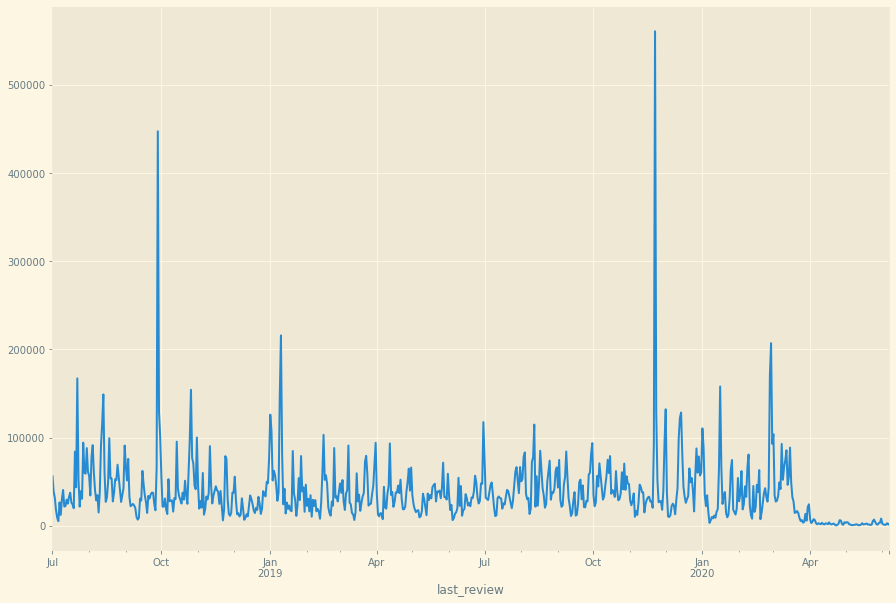

In [13]:
#Create fig
f, ax = plt.subplots(figsize = (15,10))

#Plot total revenue each day
df.groupby('last_review')['price'].sum().plot()


#Stay at home order March 19 2020